In [1]:
  #import required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read file
df=pd.read_csv('/content/drive/MyDrive/Motor Fault Detection Project/(After flipping) bosh_motor_combine_data1.csv')

In [4]:
#check first 5 rows
df.head()

,Unnamed: 0,Time (s),X-Axis (m/s2),Y- Axis (m/s2),Z-Axis (m/s2),Motor Condition,Condition
0,0,81.413979,0.794274,0.894695,-0.516979,Faulty,With Water
1,1,81.415970,-0.168581,0.174076,-2.062383,Faulty,With Water
2,2,81.417962,-0.232425,-1.181459,-0.774747,Faulty,With Water
3,3,81.419953,-1.206780,1.633993,2.984283,Faulty,With Water
4,4,81.421945,1.196976,-0.160046,2.251346,Faulty,With Water


In [5]:
#drop unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time (s)         300000 non-null  float64
 1   X-Axis (m/s2)    300000 non-null  float64
 2   Y- Axis (m/s2)   300000 non-null  float64
 3   Z-Axis (m/s2)    300000 non-null  float64
 4   Motor Condition  300000 non-null  object 
 5   Condition        300000 non-null  object 
dtypes: float64(4), object(2)
memory usage: 13.7+ MB


In [7]:
#basic statics
df.describe(include='all')

,Time (s),X-Axis (m/s2),Y- Axis (m/s2),Z-Axis (m/s2),Motor Condition,Condition
count,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000
unique,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,Faulty,With Water
freq,NaN,NaN,NaN,NaN,150000,100000
mean,137.358253,-0.000010,-0.000022,0.000020,NaN,NaN
std,46.039438,1.374821,1.323593,1.597043,NaN,NaN
min,21.549272,-5.211990,-4.781663,-4.274057,NaN,NaN
25%,106.619324,-0.918374,-0.849488,-1.354053,NaN,NaN
50%,140.356847,-0.027365,-0.118405,-0.070673,NaN,NaN
75%,170.486865,0.876397,0.844912,1.241219,NaN,NaN


## Univariate analysis

In [8]:
for col in df.columns:
  print(col)
  print(df[col].unique(),'\n')

Time (s)
[ 81.41397901  81.4159704   81.41796178 ... 178.5437613  178.5457527
 178.547744  ] 

X-Axis (m/s2)
[ 0.79427373 -0.16858111 -0.23242501 ... -0.4093978  -0.91311852
 -0.40733464] 

Y- Axis (m/s2)
[ 0.89469501  0.17407601 -1.18145925 ... -0.52130188  1.64767856
  0.52698283] 

Z-Axis (m/s2)
[-0.51697887 -2.06238318 -0.77474652 ...  1.44151978  0.25729526
 -0.95096349] 

Motor Condition
['Faulty' 'working'] 

Condition
['With Water' 'With Pressure' 'dry run'] 



In [9]:
cols=df.columns.to_list()

In [10]:
cols[0:-2]

['Time (s)', 'X-Axis (m/s2)', 'Y- Axis (m/s2)', 'Z-Axis (m/s2)']

In [11]:
def histogram(col):
  sns.distplot(df[col])
  plt.show()


<ipython-input-11-af518b77a6f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


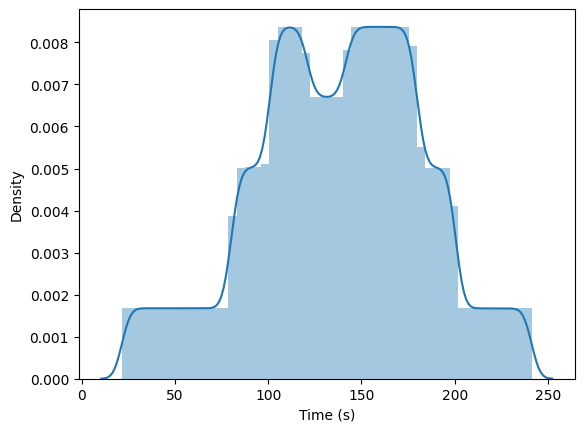

In [12]:
histogram('Time (s)')

<ipython-input-11-af518b77a6f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


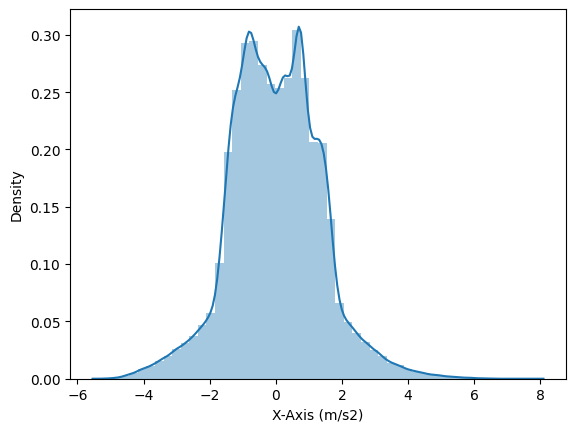

In [13]:
histogram('X-Axis (m/s2)')

<ipython-input-11-af518b77a6f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


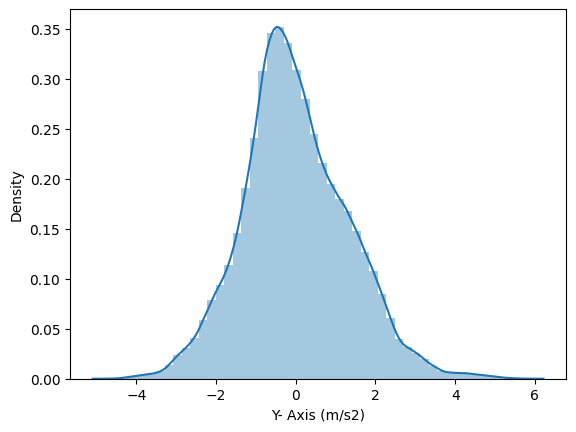

In [14]:
histogram('Y- Axis (m/s2)')

<ipython-input-11-af518b77a6f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


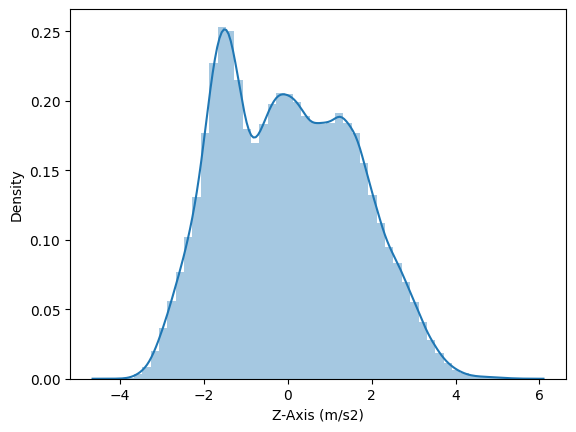

In [15]:
histogram('Z-Axis (m/s2)')

## bi-variate analysis

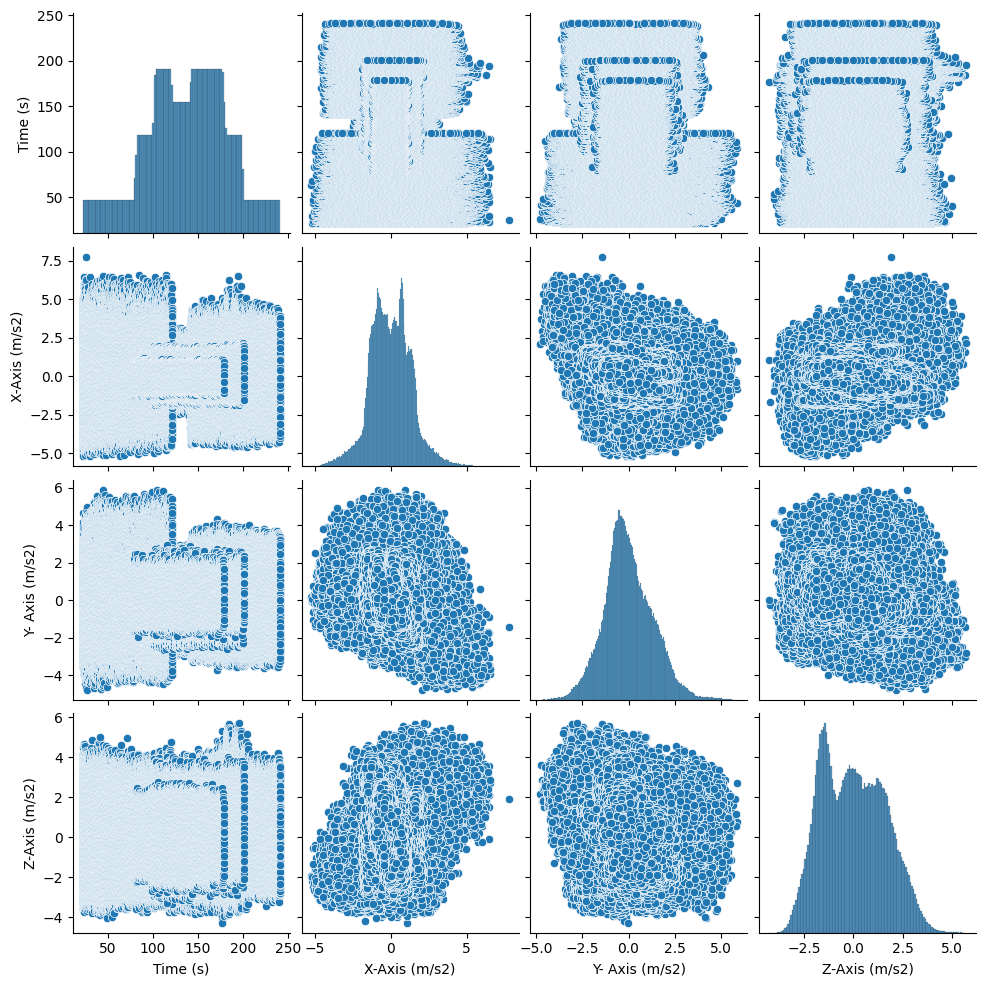

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df['max_value']=df[cols[1:-2]].max(axis=1)

In [18]:
df

,Time (s),X-Axis (m/s2),Y- Axis (m/s2),Z-Axis (m/s2),Motor Condition,Condition,max_value
0,81.413979,0.794274,0.894695,-0.516979,Faulty,With Water,0.894695
1,81.415970,-0.168581,0.174076,-2.062383,Faulty,With Water,0.174076
2,81.417962,-0.232425,-1.181459,-0.774747,Faulty,With Water,-0.232425
3,81.419953,-1.206780,1.633993,2.984283,Faulty,With Water,2.984283
4,81.421945,1.196976,-0.160046,2.251346,Faulty,With Water,2.251346
...,...,...,...,...,...,...,...
299995,178.539779,0.046753,-1.051084,1.117399,working,With Pressure,1.117399
299996,178.541770,-0.437797,0.062373,1.714000,working,With Pressure,1.714000
299997,178.543761,-0.409398,-0.521302,1.441520,working,With Pressure,1.441520
299998,178.545753,-0.913119,1.647679,0.257295,working,With Pressure,1.647679


# axis with maximun vibration

In [19]:
abs(df['X-Axis (m/s2)']).sum()/len(df)

1.0819390836371463

In [20]:
abs(df['Y- Axis (m/s2)']).sum()/len(df)

1.0387507935258768

In [21]:
abs(df['Z-Axis (m/s2)']).sum()/len(df)

1.3474653227027866

# Z-axis seem to be  having maximun vibration

# Multi-variate analysis

In [22]:
df.corr()

ValueError: could not convert string to float: 'Faulty'

ValueError: could not convert string to float: 'Faulty'

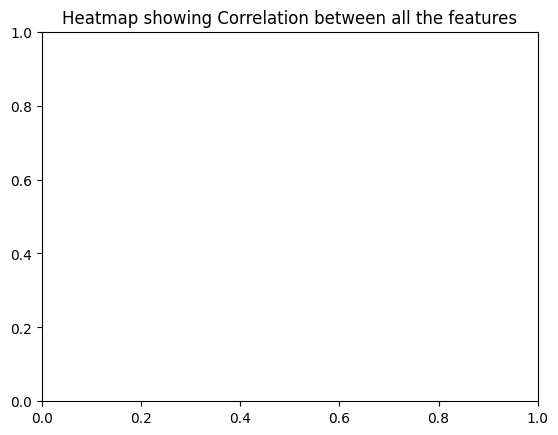

In [23]:

plt.title("Heatmap showing Correlation between all the features")
sns.heatmap(df.corr(),annot = True, cmap='mako')
plt.show()

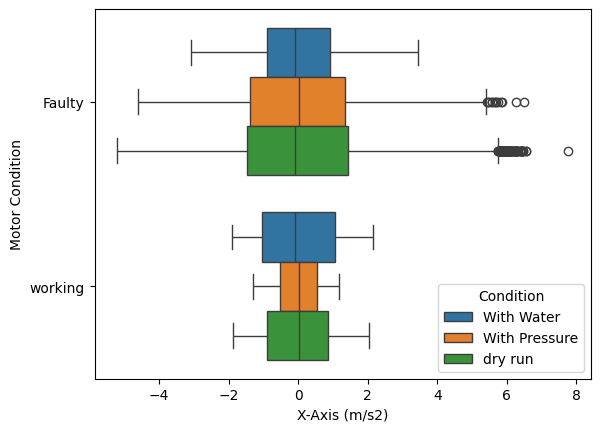

In [24]:
sns.boxplot(data=df,x='X-Axis (m/s2)',y='Motor Condition',hue='Condition')
plt.show()

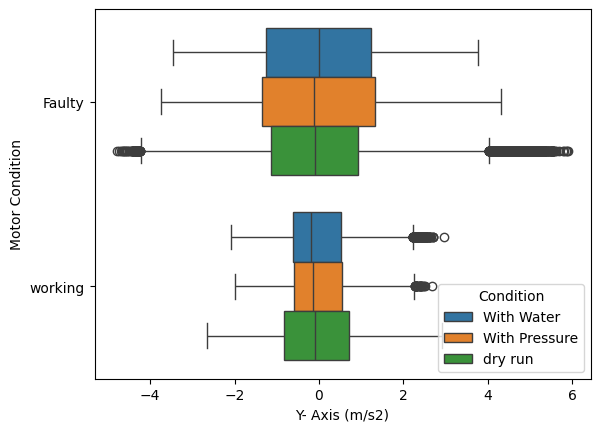

In [25]:
sns.boxplot(data=df,x='Y- Axis (m/s2)',y='Motor Condition',hue='Condition')
plt.show()

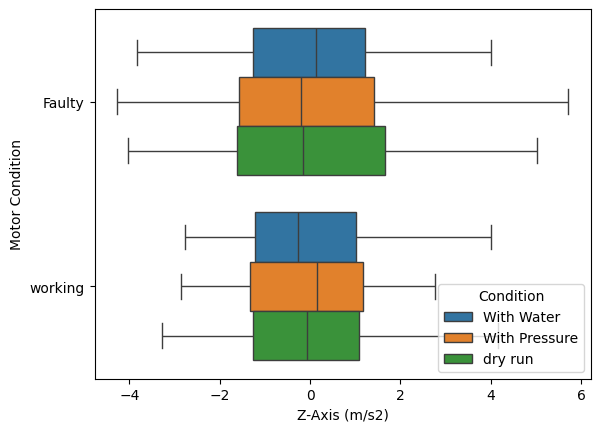

In [26]:
sns.boxplot(data=df,x='Z-Axis (m/s2)',y='Motor Condition',hue='Condition')
plt.show()

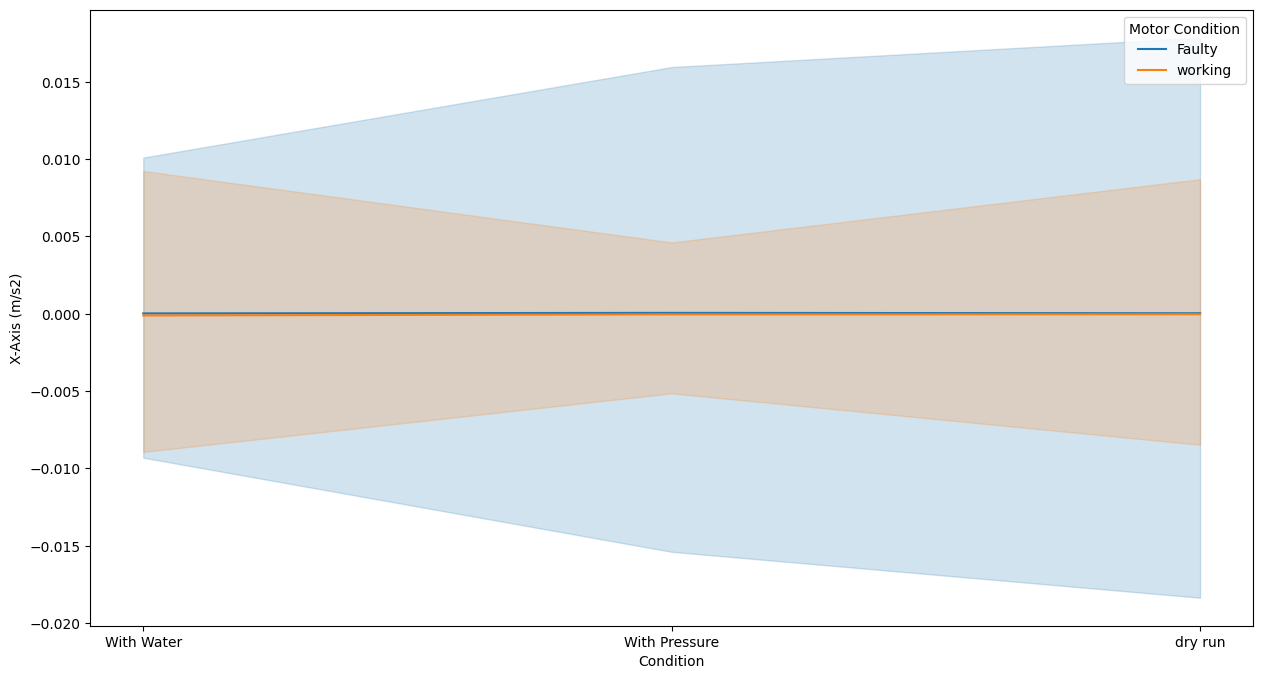

In [27]:
df_only_axis=df[['X-Axis (m/s2)','Y- Axis (m/s2)','Z-Axis (m/s2)']]
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Condition',y='X-Axis (m/s2)',hue='Motor Condition')
plt.show()

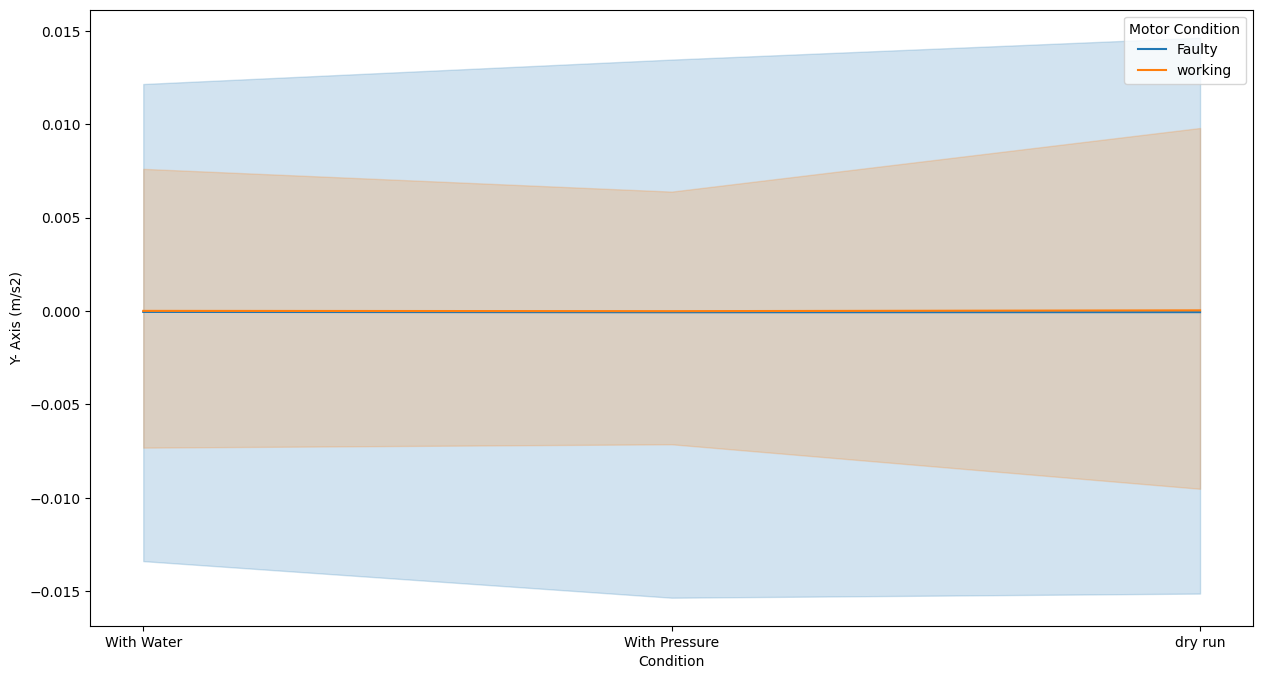

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Condition',y='Y- Axis (m/s2)',hue='Motor Condition')
plt.show()

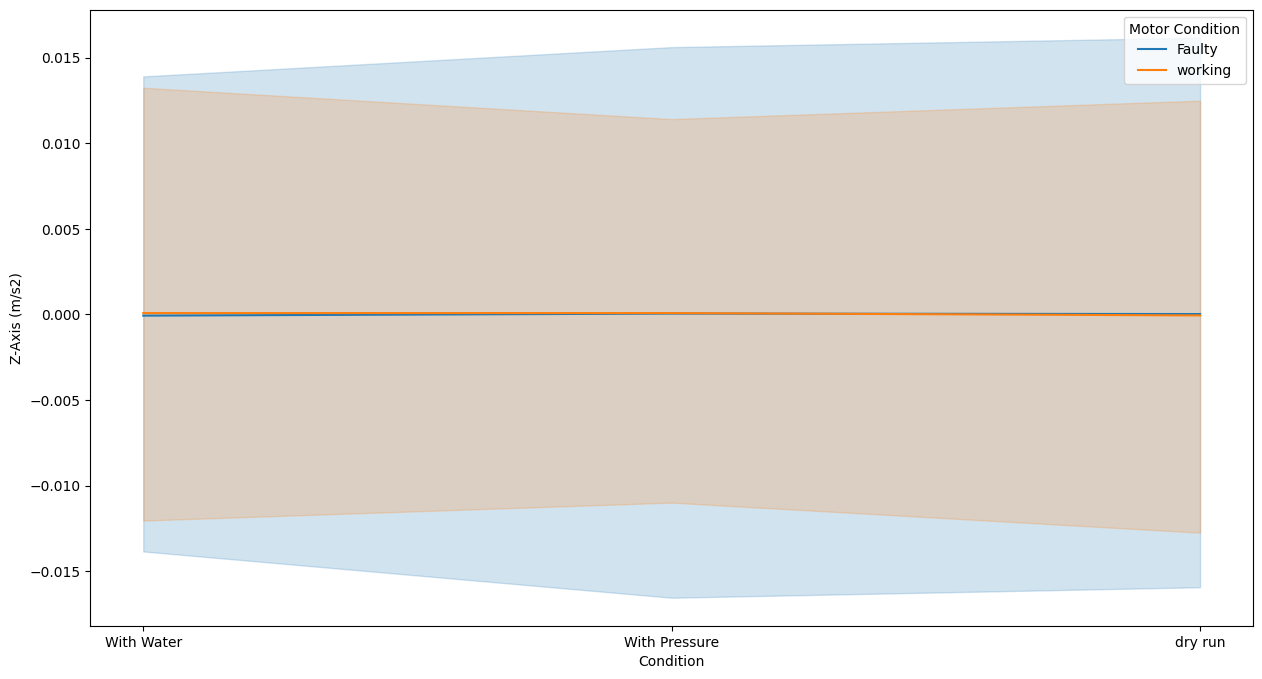

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Condition',y='Z-Axis (m/s2)',hue='Motor Condition')

plt.show()

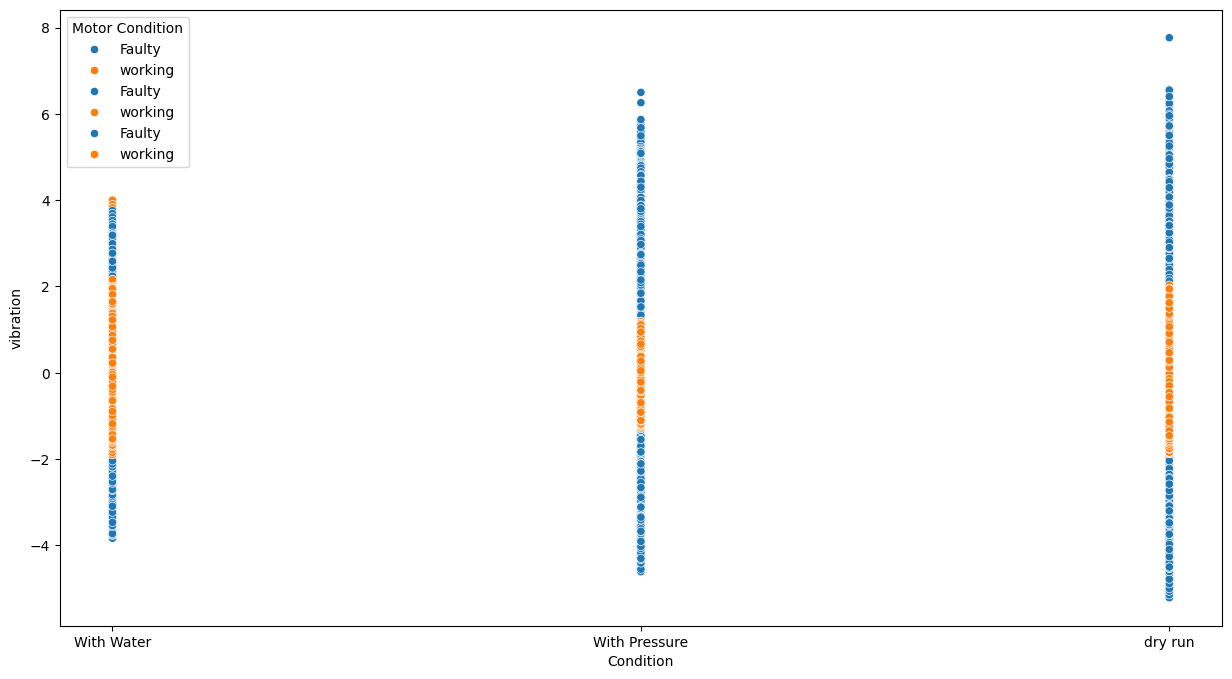

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Condition',y='Z-Axis (m/s2)',hue='Motor Condition')
sns.scatterplot(data=df,x='Condition',y='Y- Axis (m/s2)',hue='Motor Condition')
sns.scatterplot(data=df,x='Condition',y='X-Axis (m/s2)',hue='Motor Condition')
plt.ylabel('vibration')
plt.show()

##

# seperate Numeric and categorical data

In [31]:
df.columns.to_list()

['Time (s)',
 'X-Axis (m/s2)',
 'Y- Axis (m/s2)',
 'Z-Axis (m/s2)',
 'Motor Condition',
 'Condition',
 'max_value']

In [32]:
df_num=df[['Time (s)',
 'X-Axis (m/s2)',
 'Y- Axis (m/s2)',
 'Z-Axis (m/s2)',]]
df_cat=df[[ 'Motor Condition','Condition']]

# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
for col in df_cat.columns:
  df_cat[col]=le.fit_transform(df_cat[col])

<ipython-input-34-7e6855988b0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]=le.fit_transform(df_cat[col])
<ipython-input-34-7e6855988b0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]=le.fit_transform(df_cat[col])


In [35]:
df_cat

,Motor Condition,Condition
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
299995,1,0
299996,1,0
299997,1,0
299998,1,0


In [36]:
df_new=pd.concat([df_num,df_cat.drop('Motor Condition',axis=1)],axis=1)
df_new['Motor Condition']=df_cat['Motor Condition']

# scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_new.drop('Motor Condition',axis=1))
df_scaled=pd.DataFrame(scaled,columns=df_new.columns[:-1])
df_scaled.head()

,Time (s),X-Axis (m/s2),Y- Axis (m/s2),Z-Axis (m/s2),Condition
0,-1.215140,0.577737,0.675977,-0.323723,0.0
1,-1.215097,-0.122614,0.131535,-1.291391,0.0
2,-1.215054,-0.169052,-0.892600,-0.485126,0.0
3,-1.215010,-0.877767,1.234531,1.868621,0.0
4,-1.214967,0.870650,-0.120901,1.409687,0.0


In [39]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df_new['Motor Condition']

# Split data in to train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


# model building and evalution

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
def mymodel(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
  cm = confusion_matrix(y_test, y_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['working', 'faulty'],
                                 index=['working', 'faulty'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
  print(classification_report(y_test,y_pred))

## Model Logistic Regression

Model accuracy : 0.563
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     30103
           1       0.56      0.56      0.56     29897

    accuracy                           0.56     60000
   macro avg       0.56      0.56      0.56     60000
weighted avg       0.56      0.56      0.56     60000



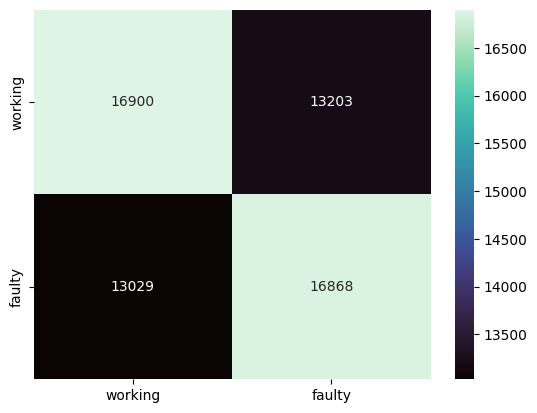

In [44]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

mymodel(lr)

## Model SVM

Model accuracy : 0.953
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     30103
           1       0.93      0.99      0.95     29897

    accuracy                           0.95     60000
   macro avg       0.96      0.95      0.95     60000
weighted avg       0.96      0.95      0.95     60000



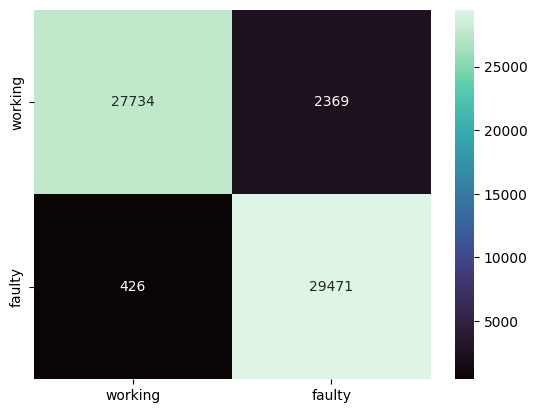

In [45]:
from sklearn.svm import SVC
svc=SVC()
mymodel(svc)


###Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['liear','poly','rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=liear;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=liear;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=liear;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=liear;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=liear;, score=nan total time=   0.0s


In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))


In [ ]:
from sklearn.cross_validation import KFold

def run_kfold(grid):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        # x_train, x_test = X_all.values[train_index], X_all.values[test_index]
        # y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        grid.fit(x_train, y_train)
        predictions = grid.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(grid)

KFold validation

https://www.kaggle.com/code/cesartrevisan/scikit-learn-and-gridsearchcv/notebook



dump the train model to use anywhere


https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle#:~:text=Pickle%20is%20a%20useful%20Python,ML%20model%20for%20future%20use.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

# Conclusion:


**Univariate analysis** helps you understand the distribution of individual variables in your dataset. Bivariate analysis allows you to examine the relationship between two variables, and multivariate analysis allows you to analyze the relationship between multiple variables simultaneously.


**Separating numeric** and **categorical data** is a crucial step in preparing data for machine learning models. Label Encoding is a way to convert categorical data into numerical data that can be used in machine learning models. Scaling the data is also important as it helps to standardize the data, making it easier for machine learning models to learn and make predictions.


Splitting the data into **training** and **testing** sets is a crucial step in machine learning. The training data is used to train the machine learning model, and the testing data is used to evaluate the performance of the model.




